In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lane = cv2.imread("../opencv-np-workshop/data/img/lane.jpg")

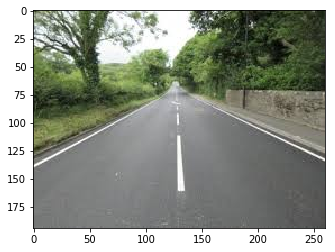

In [3]:
plt.imshow(lane[:,:,::-1])

**Motivation**: 

We want to find some structured shapes (lines, circles) in a robust way.

- We can characterize as its parameters:

$$ y = mx+b $$

Let's assign line ==> (m,b)

Instead of this coefficient space $(m,b)$, we represent a line by a pair of $(r, \theta)$

- $r$ = Normal vector to the line from the origin.
- $\theta$ = angle with $r$ and the horizontal axis.

This is the **Hough space**. 

- Lines become points.
- Points become sinusoidal curves.

**Line detection**:
- Get an edge map (detect edges through Canny).
- Each point goes to the Hough space.
- In the Hough space, "our" lines are intersection of those curves.
- A Cartesian line is detected if it is the intersection of sufficiently many of the sinusoidal curves.

# Line detection

### 1. Create edges

In [40]:
lane_gray = cv2.cvtColor(lane, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(lane_gray, threshold1=100, threshold2 = 500) #Thresholds are from Canny method 

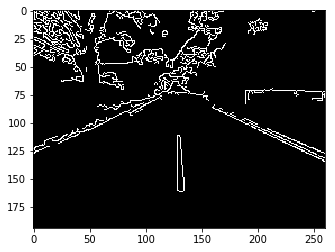

In [41]:
plt.imshow(edges, cmap="gray")

### 2. Apply the Hough transform for lines

In [56]:
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=60)
# rho: Resolution (step size) of the r-axis on Hough space
# theta: Step size for the theta-axis
# threshold: number of votes a candidate line should get
# CAREFUL WITH THE P


In [57]:
lines.shape

(55, 1, 4)

In [58]:
lane = cv2.imread("../opencv-np-workshop/data/img/lane.jpg")

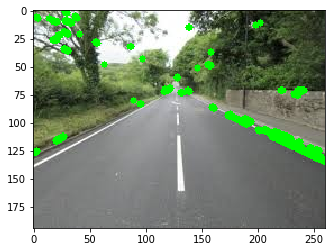

In [59]:
for l in lines:
    x1, y1, x2, y2 = l[0] # array shape...
    cv2.line(lane, (x1,y1), (x2,y2), (0,255,0), 5)
plt.imshow(lane[:,:,::-1])

# Circle detection

- Pass from the cartesian representation of the circle to a parameter space consisting of (center, radius)

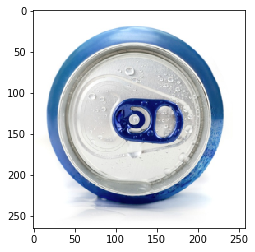

In [60]:
pepsi = cv2.imread("../opencv-np-workshop/data/img/pepsi.PNG")
plt.imshow(pepsi[:,:,::-1])

### 1. Pass to gray scale

In [62]:
pepsi_gray = cv2.cvtColor(pepsi, cv2.COLOR_BGR2GRAY)

In [102]:
circles = cv2.HoughCircles(pepsi_gray, cv2.HOUGH_GRADIENT, dp=1.25, minDist=70)
# First parameter: cv2.HOUGH_GRADIENT, only algorithm implemented... 
# dp = Inverse of the step size on the Hough space
# minDist = Minimum distance between detected circles

In [103]:
circles # (1, n_circles,center_x, center_y, radius)

array([[[120.625, 130.625,  87.25 ]]], dtype=float32)

In [104]:
x, y, r = circles[0][0]

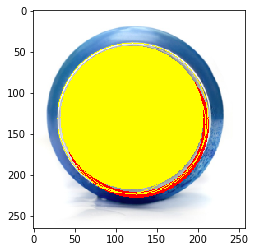

In [105]:
cv2.circle(pepsi, (x,y), r, (0,255,255), -1)
plt.imshow(pepsi[:,:,::-1])

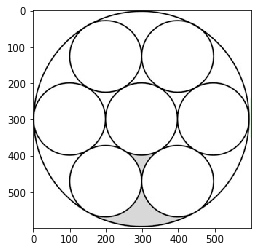

In [106]:
circles = cv2.imread("../opencv-np-workshop/data/img/circles.PNG")
plt.imshow(circles[:,:,::-1])